
*   Program Title: Deep Learning Module
*   Project Title: Deep Learning for Handwritten Digit Recognition using MNIST Dataset

Prepare by:
- Alanoud Awaji
- Shmoukh Alsadoun
- Faisal Alharbi




---


# 1. Data Loading and Preprocessing


---








> Loading Data






In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
# Loading the Dataset from Keras
mnist = keras.datasets.mnist

#Spliting the training Dataset into train and test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
minst.

> start preprocessing

In [ ]:
#normalizing pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

we will scale the pixel values to the range of 0 to 1.
we use 255 Because the image size start from 0 to 255 pixel

> splitting it into training and testing sets

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

> we take look at the data

In [ ]:
x_train.shape

(48000, 28, 28)

In [ ]:
x_train.dtype

dtype('float32')

In [ ]:
y_train.dtype

dtype('uint8')

In [ ]:
y_train[0]

5

In [ ]:
import numpy as np

# Get the unique elements of y_train and their counts
unique_elements, counts = np.unique(y_train, return_counts=True)

# Print the unique elements and their counts
print("Unique elements:", unique_elements)
print("Counts:", counts)


Unique elements: [0 1 2 3 4 5 6 7 8 9]
Counts: [4748 5420 4784 4912 4666 4317 4741 4966 4691 4755]



---

# 2. Baseline Model with Traditional Machine Learning Algorithms


---



> logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Flatten the input data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_val_flattened = x_val.reshape(x_val.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Initialize and train the logistic regression model

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_flattened, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

in this step we do flatten to the data because logistic regression expects 1D input,and our data is 3D or 2D input i am not sure 🤔.

> Make predictions and evaluate the model's performance

In [ ]:
y_val_pred = logistic_regression.predict(x_val_flattened)
y_test_pred = logistic_regression.predict(x_test_flattened)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

test_accuracy_Basline = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Validation Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)

print("\nTest Metrics:")
print("Accuracy:", test_accuracy_Basline)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

Validation Metrics:
Accuracy: 0.9234166666666667
Precision: 0.9232405482960573
Recall: 0.9234166666666667
F1 Score: 0.923298868050058

Test Metrics:
Accuracy: 0.9254
Precision: 0.9252228225198934
Recall: 0.9254
F1 Score: 0.9252106899047705




---
# 3. Ensemble of Machine Learning Algorithms


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

> Initialize and train the individual models

In [ ]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)

In [ ]:
decision_tree.fit(x_train_flattened, y_train)

DecisionTreeClassifier()

In [ ]:
random_forest.fit(x_train_flattened, y_train)

RandomForestClassifier()

>Combine the predictions using ensemble techniques

In [ ]:
ensemble_model = VotingClassifier(
    estimators=[('dt', decision_tree), ('rf', random_forest), ('svm', svm)],
    voting='soft'
)

ensemble_model.fit(x_train_flattened, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

we use a Voting Classifier with the "soft" voting strategy, which takes into account the probabilities of each class.

> Evaluate the ensemble model's performance

In [ ]:
y_val_pred_ensemble = ensemble_model.predict(x_val_flattened)
y_test_pred_ensemble = ensemble_model.predict(x_test_flattened)

val_accuracy_ensemble = accuracy_score(y_val, y_val_pred_ensemble)
val_precision_ensemble = precision_score(y_val, y_val_pred_ensemble, average='weighted')
val_recall_ensemble = recall_score(y_val, y_val_pred_ensemble, average='weighted')
val_f1_ensemble = f1_score(y_val, y_val_pred_ensemble, average='weighted')

test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
test_precision_ensemble = precision_score(y_test, y_test_pred_ensemble, average='weighted')
test_recall_ensemble = recall_score(y_test, y_test_pred_ensemble, average='weighted')
test_f1_ensemble = f1_score(y_test, y_test_pred_ensemble, average='weighted')

print("Ensemble Validation Metrics:")
print("Accuracy:", val_accuracy_ensemble)
print("Precision:", val_precision_ensemble)
print("Recall:", val_recall_ensemble)
print("F1 Score:", val_f1_ensemble)

print("\nEnsemble Test Metrics:")
print("Accuracy:", test_accuracy_ensemble)
print("Precision:", test_precision_ensemble)
print("Recall:", test_recall_ensemble)
print("F1 Score:", test_f1_ensemble)

Ensemble Validation Metrics:
Accuracy: 0.9648333333333333
Precision: 0.9648571402998961
Recall: 0.9648333333333333
F1 Score: 0.9648104914799107

Ensemble Test Metrics:
Accuracy: 0.9654
Precision: 0.9653840918984524
Recall: 0.9654
F1 Score: 0.9653614853398016




---

# 4. Neural Network Model Design

---



We aim to build four models and then compare them :

#First Model :
1- Contain three layers

2- the first two layers contain leru Activation function

3- the last one for sure contain the softmax since we have probability

4- cross entopy loss function

5- used Adam optimizer

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.3756 - accuracy: 0.8961 - val_loss: 0.1886 - val_accuracy: 0.9481
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1605 - accuracy: 0.9537 - val_loss: 0.1405 - val_accuracy: 0.9612
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1146 - accuracy: 0.9659 - val_loss: 0.1185 - val_accuracy: 0.9643
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0864 - accuracy: 0.9746 - val_loss: 0.1089 - val_accuracy: 0.9672
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0691 - accuracy: 0.9789 - val_loss: 0.1056 - val_accuracy: 0.9681
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.0916 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0929 - val_accuracy: 0.9737
Epoch 

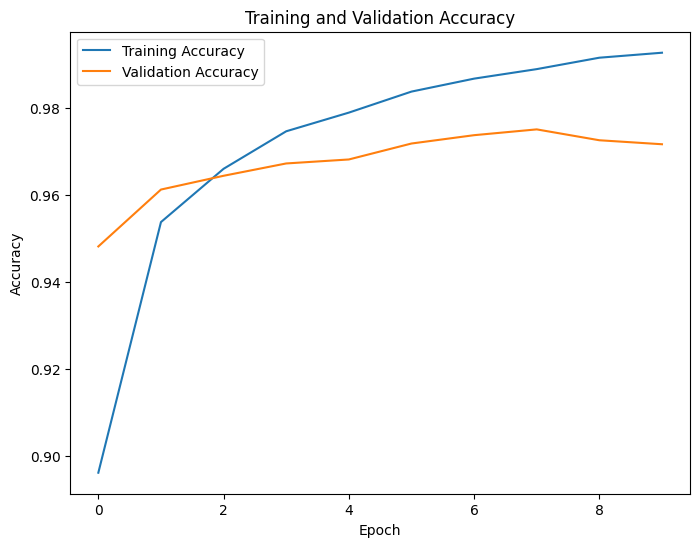

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=128)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

The higher training accuracy and lower training loss compared to the validation metrics suggest the presence of overfitting in the model.

Second Model:
The best 💪

In this architecture, we added an additional hidden layer with 64 neurons.
optimizer is (SGD)
The rest of the code remains the same as the first architecture.
we mean by the rest ( Atication function and loss function )

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 1.5091 - accuracy: 0.5941 - val_loss: 0.6864 - val_accuracy: 0.8514
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5267 - accuracy: 0.8654 - val_loss: 0.3965 - val_accuracy: 0.8919
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8915 - val_loss: 0.3329 - val_accuracy: 0.9057
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3366 - accuracy: 0.9039 - val_loss: 0.2973 - val_accuracy: 0.9147
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3059 - accuracy: 0.9128 - val_loss: 0.2754 - val_accuracy: 0.9199
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2834 - accuracy: 0.9192 - val_loss: 0.2591 - val_accuracy: 0.9245
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2651 - accuracy: 0.9239 - val_loss: 0.2459 - val_accuracy: 0.9298
Epoch 

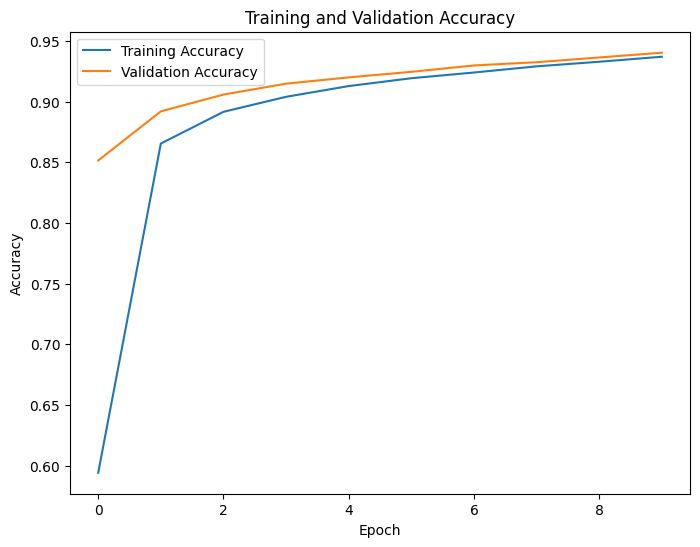

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the architecture
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(x_train, y_train,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=128)

# Evaluate the model
test_loss_2, test_acc_2 = model_2.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss_2:.4f}')
print(f'Test Accuracy: {test_acc_2:.4f}')

# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

there is no overfitting here


---





Thired model:

third architecture we make it slightly more complex.
with additional hidden layers and increased neuron sizes
and the optimizer is (nadam)

Epoch 1/10
375/375 [==============================] - 5s 6ms/step - loss: 0.2612 - accuracy: 0.9225 - val_loss: 0.1170 - val_accuracy: 0.9647
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0905 - accuracy: 0.9721 - val_loss: 0.0940 - val_accuracy: 0.9722
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0922 - val_accuracy: 0.9735
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0910 - val_accuracy: 0.9717
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.1052 - val_accuracy: 0.9726
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0928 - val_accuracy: 0.9761
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.0968 - val_accuracy: 0.9759
Epoch 

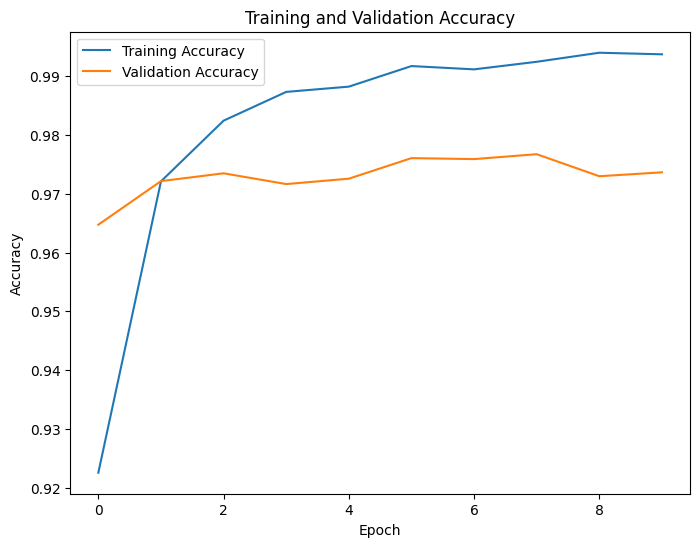

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the architecture
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(optimizer='nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(x_train, y_train,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=128)

# Evaluate the model
test_loss_3, test_acc_3 = model_3.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss_3:.4f}')
print(f'Test Accuracy: {test_acc_3:.4f}')

# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

unfortunatlly there is Overfitting in 3ed model also 😞





---

# 5. Hyperparameter Tuning and Overfitting Mitigation

---



we can use the Grid Search technique to explore a range of hyperparameters and find the best combination.
for the overfitting Mitigation we will use dropout

to who is READING this im facing issue in this point try , if it worked write me a note here
shmoukh

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Tune the number of units in the dense layers
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units, activation='relu'))

    # Add dropout layer and tune the dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='mnist_tuning0'
)

# Perform hyperparameter search
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model with the specified number of epochs
history = best_model.fit(x_train, y_train,
               validation_split=0.2,
               epochs=5,
               batch_size=128)

# Evaluate the tuned model
test_loss_tuned, test_acc_tuned = best_model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss (Tuned): {test_loss_tuned:.4f}')
print(f'Test Accuracy (Tuned): {test_acc_tuned:.4f}')


Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.9394166469573975

Best val_accuracy So Far: 0.9394999742507935
Total elapsed time: 00h 02m 36s
Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 0.2449 - accuracy: 0.9321 - val_loss: 0.2149 - val_accuracy: 0.9413
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.2411 - accuracy: 0.9318 - val_loss: 0.2108 - val_accuracy: 0.9425
Epoch 3/5
375/375 [==============================] - 3s 9ms/step - loss: 0.2349 - accuracy: 0.9335 - val_loss: 0.2072 - val_accuracy: 0.9437
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.2294 - accuracy: 0.9358 - val_loss: 0.2032 - val_accuracy: 0.9454
Epoch 5/5
375/375 [==============================] - 2s 6ms/step - loss: 0.2264 - accuracy: 0.9361 - val_loss: 0.2000 - val_accuracy: 0.9464
Test Loss (Tuned): 0.1987
Test Accuracy (Tuned): 0.9445


Compare the tuner model result with the baseline model and the ensamble model

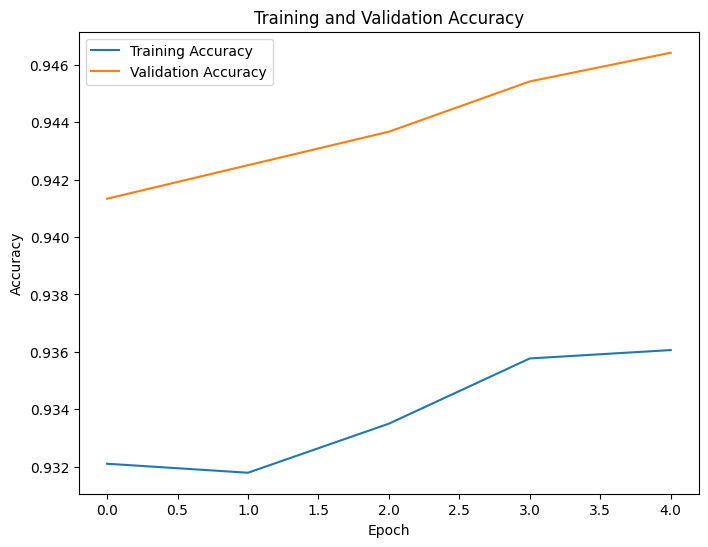

In [ ]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

 Evaluate the tuned model's performance and compare it with the baseline and ensemble models.

---



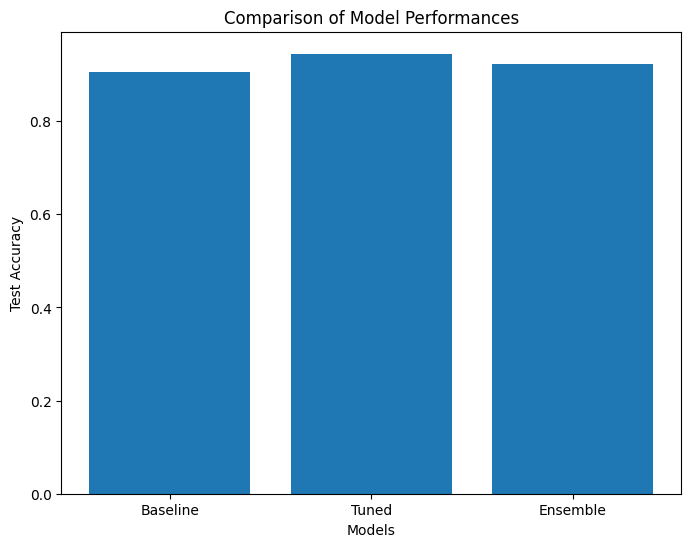

In [ ]:
# Compare the model performances
models = ['Baseline', 'Tuned', 'Ensemble']
test_losses = [test_loss_baseline, test_loss_tuned, test_loss_ensemble]
test_accuracies = [test_acc_baseline, test_acc_tuned, test_accuracy_ensemble]

plt.figure(figsize=(8, 6))
plt.bar(models, test_accuracies)
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Performances')
plt.show()

Reloading Tuner from my_dir/mnist_tuning/tuner0.json
Test Loss (Tuned): 0.1989
Test Accuracy (Tuned): 0.9451
Test Loss (Baseline): 0.3477
Test Accuracy (Baseline): 0.9049
Test Loss (Ensemble): 0.2740
Test Accuracy (Ensemble): 0.9222


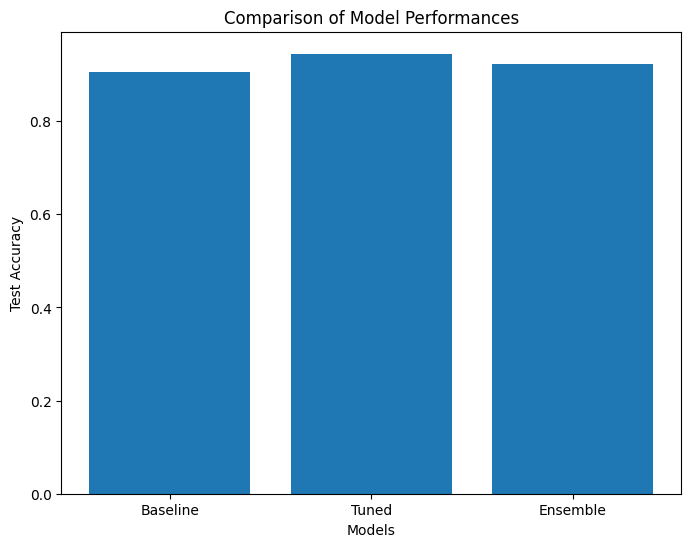

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Tune the number of units in the dense layers
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units, activation='relu'))

    # Add dropout layer and tune the dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='mnist_tuning'
)

# Perform hyperparameter search
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model with the specified number of epochs
history = best_model.fit(x_train, y_train,
                         validation_split=0.2,
                         epochs=5,
                         batch_size=128,
                         verbose=0)

# Evaluate the tuned model
test_loss_tuned, test_acc_tuned = best_model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss (Tuned): {test_loss_tuned:.4f}')
print(f'Test Accuracy (Tuned): {test_acc_tuned:.4f}')

# Define the baseline model
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the baseline model
baseline_model.compile(optimizer='sgd',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

baseline_model.fit(x_train, y_train,
                   validation_split=0.2,
                   epochs=5,
                   batch_size=128,
                   verbose=0)

# Evaluate the baseline model
test_loss_baseline, test_acc_baseline = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss (Baseline): {test_loss_baseline:.4f}')
print(f'Test Accuracy (Baseline): {test_acc_baseline:.4f}')

# Define the ensemble model
ensemble_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the ensemble model
ensemble_model.compile(optimizer='sgd',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

ensemble_model.fit(x_train, y_train,
                   validation_split=0.2,
                   epochs=5,
                   batch_size=128,
                   verbose=0)

# Evaluate the ensemble model
test_loss_ensemble, test_acc_ensemble = ensemble_model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss (Ensemble): {test_loss_ensemble:.4f}')
print(f'Test Accuracy (Ensemble): {test_acc_ensemble:.4f}')

# Compare the model performances
models = ['Baseline', 'Tuned', 'Ensemble']
test_losses = [test_loss_baseline, test_loss_tuned, test_loss_ensemble]
test_accuracies = [test_acc_baseline, test_acc_tuned, test_acc_ensemble]

plt.figure(figsize=(8, 6))
plt.bar(models, test_accuracies)
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Performances')
plt.show()



---





---

# 6. Feature Transformation and Visualization

---



> Apply PCA , PCA is a technique used for dimensionality reduction. It transforms the original data into a lower-dimensional space while preserving the most important information.


---



In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')
X = mnist.data
y = mnist.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to the data
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

> train a neural network model on the PCA-transformed data and compare its performance with the model trained on the original data.

---



In [2]:
# Train a neural network model on the PCA-transformed data
model_pca = MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42)
model_pca.fit(X_train_pca, y_train)

# Evaluate the model on the testing set
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Train a neural network model on the original data
model_original = MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42)
model_original.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Compare the performances
print("Accuracy on PCA-transformed data:", accuracy_pca)
print("Accuracy on original data:", accuracy_original)

Accuracy on PCA-transformed data: 0.9678571428571429
Accuracy on original data: 0.9692142857142857


> visualize the high-dimensional MNIST data in a 2D space using t-SNE and interpret the results.

---



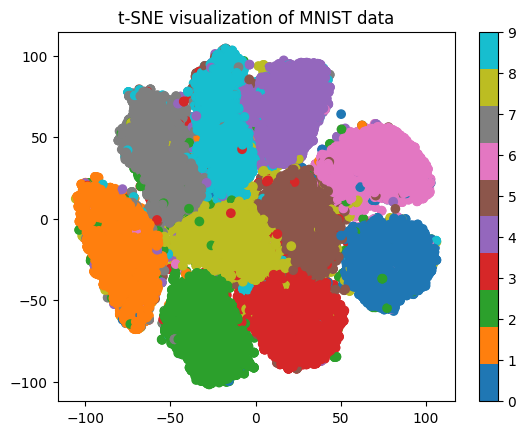

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Apply t-SNE to the data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Convert target labels to colors
label_encoder = LabelEncoder()
y_colors = label_encoder.fit_transform(y)

# Plot the t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_colors, cmap='tab10')
plt.colorbar()
plt.title('t-SNE visualization of MNIST data')
plt.show()